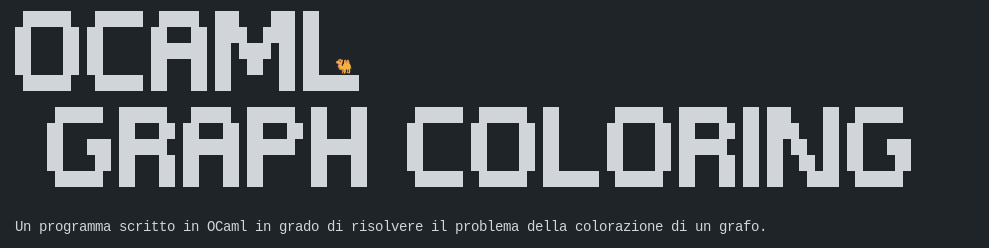

**TODO:**

- _Algoritmo_
    - [ ] **Controllare se effettivamente l'algoritmo funziona !!**
    - [x] Ricontrollare TUTTI i grafi. Il 6 è scritto bene ma l'immagine è sbagliata !!!
        - Ora sono tutti giusti !
    - [x] Aggiungere tutti gli altri problemi
        - [x] Aggiungere anche le immagini dei grafi
    - [x] Creare una sezione alla fine per test interattivi in live
    - [ ] Vedere se aggiungere un secondo algoritmo di risoluzione
    - [x] Vedere se e' possibile, con python, visualizzare meglio il risultato della colorazione
        - sembra essere abbastanza complesso, ma dovrei aver trovato un modo, se solo riuscissi a scaricare matplotlib 🙃 
        - Finalmente sono riuscito a scaricare matplotlib e funziona a decenza 🚀

- _Relazione_
    - [ ] Aggiungere descrizione esaustiva ad ogni cella di codice
        - [x] Breve descrizione per ogni grafo
    - [ ] Completare parte della relazione
        - [ ] Completare sezione GraphUtils
    - [ ] Rileggere tutto !!    
    - [ ] Convertire in PDF come relazione

## Indice

- [Obiettivo](#obiettivo)
- [Definizione di Tipi ed Eccezioni](#definizioni)
- [Definizione dei Problemi](#problemi)
    - [Problema 1](#p1)
    - [Problema 2](#p2)
    - [Problema 3](#p3)
    - [Problema 4](#p4)
    - [Problema 5](#p5)
    - [Problema 6](#p6)
- [Inclusione Moduli](#moduli)
- [Librerie Python](#libreriep)
- [Funzioni Ausiliarie](#ausiliarie)
- [Funzione Principale](#principale)
- [I 💔 Jupyter](#progetto)
    - [Makefile](#makefile)
    - [Printer](#printer)
    - [Data](#data)
    - [GraphUtils](#graphutils)
    - [Main](#main)
    - [Python](#python)
- [Ambiente di Sviluppo 🐳](#ambiente)

## Obiettivo <a id='obiettivo'></a>

L’obiettivo di questo progetto è quello di realizzare un programma scritto in **OCaml** che
risolva il _problema_ della _colorazione di un grafo_: riuscire a colorare, se possibile, ogni nodo
del grafo in modo da non avere mai nodi adiacenti con lo stesso colore. In via più formale,
dato un grafo $g$ ed un numero massimo di colori utilizzabili $N$, assegnare un colore (da $0$ a
$N − 1$) ai nodi in modo tale che non esistano nodi adiacenti con lo stesso colore; qualora il
numero di colori $N$ non sia sufficiente per realizzare la colorazione, riportare un errore.

## Definizione di Tipi ed Eccezioni <a id='definizioni'></a>

Definisco il tipo di dato `grafo` e `problema` con i relativi costruttori di tipo `Grafo` e `Problema`.<br>
Il primo tipo rappresenta un _grafo_, quindi la funzione _successori_ che dato un intero (un nodo) restituisce tutti i suoi nodi vicini (i successori).<br>
Il secondo va a rappresentare il _problema da risolvere_, questo è composto da un **grafo** (che andrà colorato), dal **nodo di partenza** e dal massimo numero di **colori utilizzabili** $N$.

In [1]:
type grafo = Grafo of (int -> int list);;
type problema = Problema of grafo * int * int;;

type grafo = Grafo of (int -> int list)


type problema = Problema of grafo * int * int


La seguente eccezione verrà lanciata per segnalare che il problema in qestione non è risolvibile dato che il grafo non è colorabile con il numero di colori dato.

In [2]:
(* TODO: cambiare con NumeroColoriInsifficiente *)
exception InsufficentColorNumber;;

exception InsufficentColorNumber


<a id='a1'></a>


## Definizione dei Problemi <a id='problemi'></a>

Ho deciso di rappresentare ogni grafo da colorare come un `Problema` composto da 3 elementi distinti:

1. `succ`: la funzione successori che definisce tutti i nodi vicini raggiungibili da ogni altro nodo. Questo rappresenta il **Grafo** da colorare
2. `start`: nodo di partenza per la colorazione
3. `maxColori`: numero massimo ($N$) di colori da utilizzare durante la colorazione


Per esempio, il problema costituito dal seguente grafo 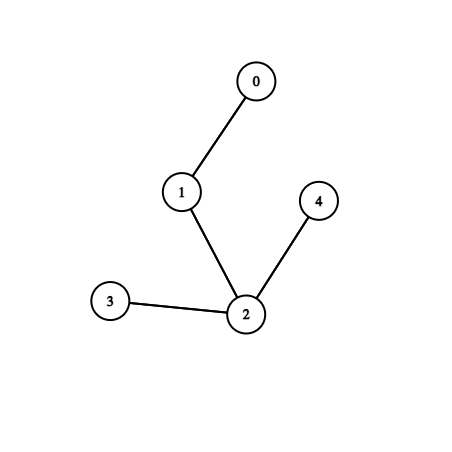
con partenza dal nodo $0$ e con un numero di colori $N=2$ è rappresentato dalla parte di codice sottostante

```ocaml
let problema =
  let x = function        
        0 -> [1]
      | 1 -> [0; 2]
      | 2 -> [1; 3; 4]
      | 3 -> [2]
      | 4 -> [2]
      | _ -> [] in
  let start = 0 in       (* Partenza *)
  let maxColori = 2 in   (* Massimo numero di colori*)
  let succ = Grafo x in  (* Successori *)

  (Problema (succ, start, maxColori))
;;
```
    

### Problema 1 <a id='p1'></a>

Il **problema 1** è formato da un grafo non orientato e sconnesso, composto da 7 nodi.<br>
Il punto di partenza è il _nodo 3_ ed ha un numero massimo di colori $N = 3$.<br>
Questo problema è stato scelto per far vedere come l'algoritmo si comporta con grafi sconnessi: andrà a colorare solo i nodi che riesce a raggiungere.

In [3]:
let problema_1 =
  let x = function        
        0 -> [1; 2]
      | 1 -> [0; 2; 3]
      | 2 -> [0; 1]
      | 3 -> [1; 4]
      | 4 -> [3]
      | 5 -> [6]
      | _ -> [] in
  let start = 3 in       (* Partenza *)
  let maxColori = 3 in   (* Massimo numero di colori*)
  let succ = Grafo x in  (* Successori *)

  (Problema (succ, start, maxColori))
;;

val problema_1 : problema = Problema (Grafo <fun>, 3, 3)


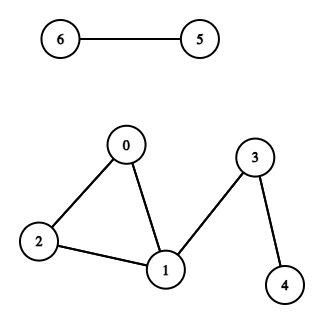

### Problema 2 <a id='p2'></a>

Questo problema è composto da un grafo non orientato e connesso che presenta vari cicli.<br>
Ce ne sono 2 varianti:

1. la prima è quella che può essere colorata senza problemi con partenza dal _nodo 0_ e numero massimo di colori $N = 4$
2. la seconda non è colorabile dato che il numero massimo di colori $N = 3$ non risultano sufficienti per la risoluzione del problema (ne servono minimo 4). 

In [4]:
let problema_2_err = 
  let x = function        
        0 -> [1; 2; 3; 4; 5]
      | 1 -> [0; 3]
      | 2 -> [0; 5; 4]
      | 3 -> [0; 1; 4]
      | 4 -> [0; 3; 2; 5]
      | 5 -> [0; 2; 4]
      | _ -> [] in

    let start = 0 in            (* Partenza *)
    let maxColori = 3 in        (* Massimo numero di colori*)
    let succ = Grafo x in  (* Successori *)
    
    (Problema (succ, start, maxColori))
;;

val problema_2_err : problema = Problema (Grafo <fun>, 0, 3)


In [5]:
let problema_2 = 
  let x = function        
        0 -> [1; 2; 3; 4; 5]
      | 1 -> [0; 3]
      | 2 -> [0; 5; 4]
      | 3 -> [0; 1; 4]
      | 4 -> [0; 3; 2; 5]
      | 5 -> [0; 2; 4]
      | _ -> [] in

    let start = 0 in            (* Partenza *)
    let maxColori = 4 in        (* Massimo numero di colori*)
    let succ = Grafo x in  (* Successori *)
    
    (Problema (succ, start, maxColori))
;;

val problema_2 : problema = Problema (Grafo <fun>, 0, 4)


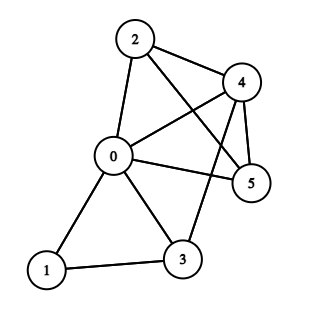

### Problema 3 <a id='p3'></a>

Il **problema 3** ha un altro grafo con 7 nodi, con una topologia abbastanza basilare, un numero massimo di colori $N = 3$ ed il _nodo 0_ come punto di partenza.

In [6]:
let problema_3 = 
  let x = function
      0 -> [1 ; 5]
    | 1 -> [0; 2]
    | 2 -> [5; 4; 3; 1; 6]
    | 3 -> [2; 6]
    | 4 -> [2]
    | 5 -> [0; 2]
    | 6 -> [2; 3]
    | _ -> [] in
    
    let start = 0 in            (* Partenza *)
    let maxColori = 3 in        (* Massimo numero di colori*)
    let succ = Grafo x in  (* Successori *)

    (Problema (succ, start, maxColori))
;;

val problema_3 : problema = Problema (Grafo <fun>, 0, 3)


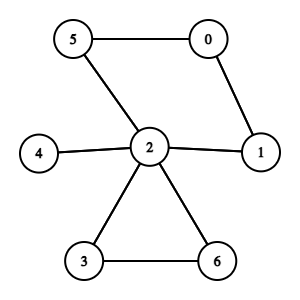

### Problema 4 <a id='p4'></a>

Il grafo di questo problema è _orientato_ ed è stato scelto per verificare il comportamento dell'algoritmo. Il _nodo 0_ è in collegamento con tutti gli altri, ma questi non possono raggiungerlo. Il punto di partenza è il _nodo 0_ ed ha un numero di colori massimo $N = 3$.

In [7]:
let problema_4 = 
  let x = function
      0 -> [1; 2; 3; 4]
(*     | 1 -> [0]
    | 2 -> [0]
    | 3 -> [0]
    | 4 -> [0] *)
    | _ -> [] in
    
    let start = 0 in            (* Partenza *)
    let maxColori = 3 in        (* Massimo numero di colori*)
    let succ = Grafo x in  (* Successori *)

    (Problema (succ, start, maxColori))
;;

val problema_4 : problema = Problema (Grafo <fun>, 0, 3)


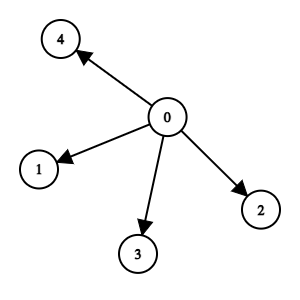

### Problema 5 <a id='p5'></a>

Il grafo del **problema 5** ha un numero maggiore di nodi, con la presenza di cicli e cammini ridondanti. È stato scelto per testare le performance dell'algoritmo e per accertare la sua correttezza. Ha un numero massimo di colori $N = 2$ e come punto di partenza il _nodo 0_.

In [8]:
let problema_5 = 
  let x = function
       0 -> [1; 2; 6; 7]
    |  1 -> [0; 8]
    |  2 -> [0; 3]
    |  3 -> [2;4;5]
    |  4 -> [3;5]
    |  5 -> [3;4;6;10]
    |  6 -> [0;5]
    |  7 -> [0;8]
    |  8 -> [1;7]
    | 10 -> [5]
    | _  -> [] in
    
    let start = 0 in            (* Partenza *)
    let maxColori = 2 in        (* Massimo numero di colori*)
    let succ = Grafo x in  (* Successori *)

    (Problema (succ, start, maxColori))
;;

val problema_5 : problema = Problema (Grafo <fun>, 0, 2)


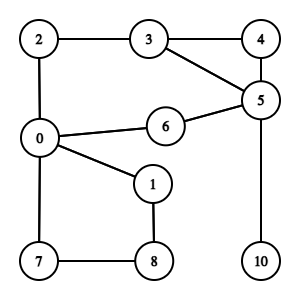

### Problema 6 <a id='p6'></a>

L'ultimo problema è formato da un grafo abbastanza grande, con un elevato numero di nodi, presenza di cicli e cammini ridondanti. Anche questo è stato utilizzato per vedere come si comporta l'algoritmo su grafi di modeste dimensioni.

In [9]:
let problema_6 = 
  let x = function
       0 -> [1]
    |  1 -> [0; 2; 3]
    |  2 -> [1; 4; 5]
    |  3 -> [1; 12]
    |  4 -> [2; 6]
    |  5 -> [2; 11]
    |  6 -> [4; 7; 8]
    |  7 -> [6; 10]
    |  8 -> [6; 9; 10]
    |  9 -> [8; 11]
    | 10 -> [7; 12; 13]
    | 11 -> [5; 9; 15]
    | 12 -> [3; 10; 13]
    | 13 -> [10; 12; 14; 16]
    | 14 -> [13]
    | 15 -> [11]
    | 16 -> [13; 17]
    | 17 -> [16]
    | _  -> [] in

  let start = 0 in            (* Partenza *)
  let maxColori = 3 in        (* Massimo numero di colori*)
  let succ = Grafo x in  (* Successori *)

  (Problema (succ, start, maxColori))
;;

val problema_6 : problema = Problema (Grafo <fun>, 0, 3)


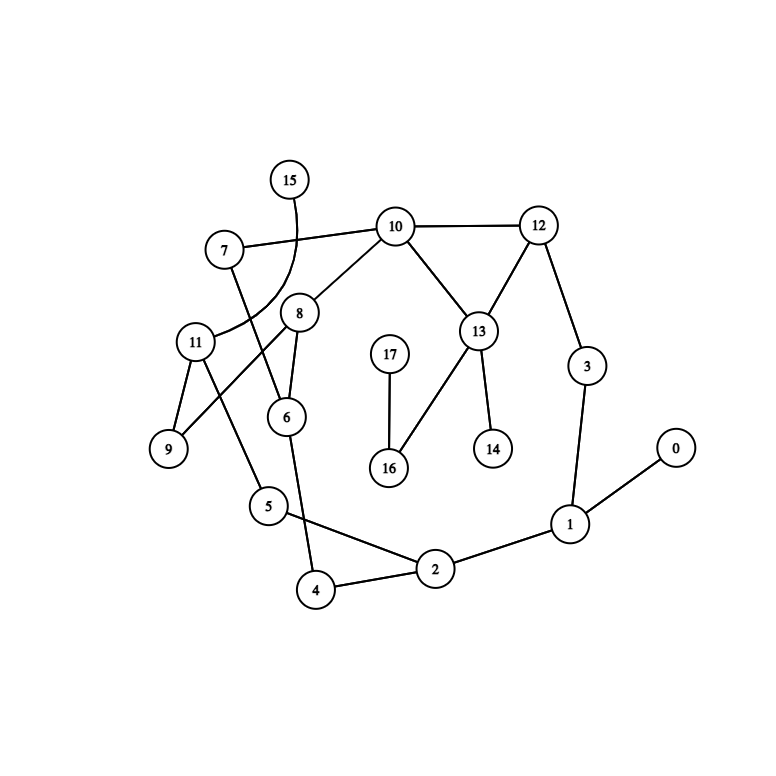

## Inclusione Moduli <a id='moduli'></a>

Includo il modulo `jupyter` per poter gestire stampe ed immagini nel notebook direttamente da Ocaml, dato che i comandi speciali _Magic_ (`%` e `%%`) sono solo disponibili con il kernel python 😞.

In [10]:
#require "jupyter.notebook" ;;
open Jupyter_notebook ;;

## Librerie Python <a id='libreriep'></a>

Procedo all'installazione (tramite pip) delle librerie necessarie al funzionamento dello script python.

In [ ]:
Process.sh "pip3 install matplotlib";;
Process.sh "pip3 install pyvis";;

## Funzioni Ausiliarie <a id='ausiliarie'></a>

In [11]:
let get_colore nodo colorati = 
  let rec aux nodo = function (*lista di nodi colorati*)
      (x,y)::coda ->    (*caso ricorsivo, prende il primo elemento della forma (x,y)*)
        if x = nodo     (*  se l'elemento in questione è il nodo che cerco*)
          then y        (*    ritorna il colore del nodo*)
        else 
          aux nodo coda (*  continua con la ricorsione*)

      | _ -> (-1)       (*se la lista finisce vuol dire che il nodo non è colorato.*)

  in aux nodo colorati   (*avvia la ricorsione cone nodo=nodo lista_di_nodi_colorati=colorati*)
;;

val get_colore : 'a -> ('a * int) list -> int = <fun>


In [12]:
let rec max_lista = function   (* lista su cui trovare il massimo *)
     [x]      -> x                      (*caso base, la lista ha un solo elemento. Ritrona lui come massimo*)
    | x::coda -> max x (max_lista coda) (*caso ricorsivo, prende il primo elemento e trova il massimo tra lui e gli altri.*)
    | _       -> 0                      (*in tutti gli altri casi [per essere sicuro]*)
;;

val max_lista : int list -> int = <fun>


In [13]:
let rec tutti_colori_vicini vicini colorati =
  let rec aux risultato = function (*lista di nodi*)
      []        -> risultato   (*caso base, non ci sono più nodi di cui prendere il colore. Ritorna tutti i colori trovati*)
    | x::coda   ->             (*caso ricorsivo, esamina il primo nodo*)
      aux 
          (risultato@[get_colore x colorati]) (*aggiunge al risultato il colore del nodo analizzato*)
          coda                                (*toglie il nodo analizzato dalla lista e continua*)
  
  in aux [] vicini   (*avvia la ricorsione con risultato=[] e lista_di_nodi=vicini*)
;;

val tutti_colori_vicini : 'a list -> ('a * int) list -> int list = <fun>


In [14]:
let max_colore_vicini (Grafo succ) nodo colorati =
  let vicini = (succ nodo) in                                     (*prende i vicini del nodo*)            
    let colori_vicini = tutti_colori_vicini vicini colorati in    (*  prende tutti i colori dei vicini*)
      max_lista colori_vicini                            (*calcola il massimo tra tutti i colori presi*)
;;

val max_colore_vicini : grafo -> int -> (int * int) list -> int = <fun>


In [15]:
let calcola_lista_colori maxColori = 
  let rec aux risultato = function (* colore *)
      0 -> List.rev risultato               (*caso base, tutti i colori analizzati. Ritorna la lista invertita [con il giusto ordine]*)
    | x -> 
      aux                                   (*caso ricorsivo, somma al risultato il colore precedente all'attuale per trovare un nuovo colore*)
        (risultato@[(x-1)])                 (* aggiunge il numero alla lista*)
        (x-1)                               (* continua con il nuovo numero*)
  in aux [] maxColori     (*avvia la funzione con risultato=[] e colore=maxColori*)
;;

val calcola_lista_colori : int -> int list = <fun>


In [16]:
let lista_colori = ref [0;];;

val lista_colori : int list ref = {contents = [0]}


In [17]:
let scegli_colore (Grafo succ) nodo colorati = 
  let vicini = succ nodo in                                         (*tutti i vicini del nodo*)
    let colori_vicini = tutti_colori_vicini vicini colorati in      (*tutti i colori vicini del nodo*)
      let rec cerca_colore_nonusato = function (* lista colori da provare*)
        []        -> raise InsufficentColorNumber;    (*caso base, non ci sono colori disponibili*)
        |x::coda  ->                                  (*caso ricorsivo, analizza il colore*)
          if List.mem x colori_vicini                 (* il colore è tra i colori vicini*)
            then
              cerca_colore_nonusato coda              (*  continua la ricorsione ignorandolo*)
        else                                          (* il colore non è tra i vicini*)
          x                                           (*  trovato! Lo ritorna*)
        in cerca_colore_nonusato !lista_colori      (*avvia la ricorsione con la lista di colori*)
;;

val scegli_colore : grafo -> int -> (int * int) list -> int = <fun>


In [18]:
let incrementa_colore_nodi risultato nodi colore = 
  List.map (fun(x, y) -> if ((List.mem x nodi) && (colore=(get_colore x risultato))) then (x, y+1) else (x, y)) risultato
;;

val incrementa_colore_nodi :
  ('a * int) list -> 'a list -> int -> ('a * int) list = <fun>


In [19]:
let inizializza_risultato (Grafo succ) partenza =
  let rec bfs visitati risultato = function (* frontiera *)
      [] -> risultato
    | nodo::coda ->
      if List.mem nodo visitati
        then 
          bfs visitati risultato coda
      else
        bfs 
          (visitati@[nodo])
          (risultato@[(nodo, 0)])
          (coda@(succ nodo)) 

      in bfs [] [] [partenza]
    ;;

val inizializza_risultato : grafo -> int -> (int * int) list = <fun>


In [20]:
let controlla_risultato risultato maxColori = 
  let rec aux = function (* risultato *)
      [] -> true
    | (nodo,colore)::coda ->
      if colore >= maxColori
        then 
          false
      else
        aux coda
  in aux risultato
;; 

val controlla_risultato : ('a * 'b) list -> 'b -> bool = <fun>


In [21]:
let grafodati_file = "grafo.data";; (*Nome del file su cui vengono salvati i dati del grafo*)
let salva_grafo_colorato (Grafo succ) colorati = 
  let oc = open_out grafodati_file in           (*Apertura del file in scrittura*)
    let rec salva_lista =                       (*Funzione ausiliaria per salvare su file una lista data*)
      function (* lista *)
         [x]      -> Printf.fprintf oc "%d" x   (* caso base, se la lista ha un solo elemento lo stampa (senza " ")*)
        | x::coda ->                            (* caso ricorsivo, la lista ha più elementi*)            
          Printf.fprintf oc "%d " x;            (*  stampa l'elemento*)
          salva_lista coda                      (*  continua la ricorsione*)
        | _ -> ()
    in let rec salva =                                (*Funzione ausiliaria per salvare nodo - vicini - colore su file*)
      function (* lista nodi_colorati *)
         [] -> Printf.fprintf oc "\n"; close_out oc   (* caso base, la lista è finita. Stampo un \n e chiudo il file*)
        |(nodo, colore)::coda ->                      (* caso ricorsivo, stampo nodo,lista vicini,colore nodo*)
          Printf.fprintf oc "%d," nodo; salva_lista (succ nodo); Printf.fprintf oc ","; Printf.fprintf oc "%d\n" colore; 
          salva coda

    in salva colorati (*avvia la funzione ausiliaria per salvare il grafo su file*)
;;

val grafodati_file : string = "grafo.data"


val salva_grafo_colorato : grafo -> (int * int) list -> unit = <fun>


Questo set di funzioni serve per mostrare immagini all'interno del notebook ed avviare lo script in python responsabile della rappresentazione grafica del risultato della colorazione. È anche presente una funzione per la rimozione dei file temporanei, come il risultato della risoluzione del problema che OCaml passerà a python o l'immagine generata dallo scirpt. La funzione `rappresenta` è quella che combina tutte le altre per ottenre il risultato desiderato e questa verrà invocata solo quando la colorazione del grafo sarà completa ed avvenuta con successo.

Nelle verie funzioni ausiliare c'è una parte di codcie comune a tutte, `forza_unid`, definita come segue:

```ocaml
let forza_unit _ = ();;
```

Questo permette di ignorare il valore di ritorno di qualunque espressione passata a questa funzione ed ottenere così `unit` come valore finale di ogni espressione.

In [22]:
let forza_unit _ = ();;       (*forza unit come valore di ritorno ignorando quello dell'espressione data*)
let avvia_python = fun () ->
    forza_unit (Process.sh "python3 progetto/src/rappresentazione_grafo/rappresentazione_grafo.py grafo.data injupyter")
;;
let mostra_immagine = fun () ->
    forza_unit (Jupyter_notebook.display_file ~base64:true "image/png" "risultato.png")
;;
let pulisci = fun () ->
    forza_unit (Process.sh "rm grafo.data risultato.png")
;;


let stampa_risultato risultato = 
    let rec aux = function (*lista da stampare*)
        [] -> () ;                                   (*caso base, la lista è finita.*)
      | (nodo, colore)::coda ->                      (*caso ricorsivo, stampa l'elemento e continua*)
          forza_unit (Jupyter_notebook.display "text/html" ((string_of_int nodo) ^ "-" ^ (string_of_int colore))); ();
          aux coda
    in aux risultato;
;;


let rappresenta = fun () -> 
    avvia_python ();
    mostra_immagine ();
    pulisci ()
;; 

val forza_unit : 'a -> unit = <fun>


val avvia_python : unit -> unit = <fun>


val mostra_immagine : unit -> unit = <fun>


val pulisci : unit -> unit = <fun>


val stampa_risultato : (int * int) list -> unit = <fun>


val rappresenta : unit -> unit = <fun>


## Funzione Principale <a id='principale'></a>

In [23]:
let risolvi (Problema ((Grafo succ), partenza, maxColori)) =
  let risultato = inizializza_risultato (Grafo succ) partenza in
  let rec esplora visitati colorati = 
    function (*frontiera*)
        []            ->  (*fine delle ricorsione, se la frontiera è vuota la colorazione è finita*)
          if controlla_risultato colorati maxColori 
            then (stampa_risultato colorati; salva_grafo_colorato (Grafo succ) colorati; rappresenta ())
            (*then colorati; *)
          else 
            raise InsufficentColorNumber
      | nodo::coda    ->           (*caso ricorsivo, continua a colorare*)
        if List.mem nodo visitati              (*se il nodo è già stato visitato*)
          then esplora visitati colorati coda  (* ignora il nodo ed estrae il successivo dalla frontiera*)
        
        else 
          (*continua con la ricorsione espandendo i nodi vicini al nodo*)
          esplora 
                (visitati@[nodo])                                                        (*aggiunge il nodo attuale ai visitati*)
                (incrementa_colore_nodi colorati (succ nodo) (get_colore nodo colorati)) (*colora il nodo [aggiunge la coppia (nodo,colore) a colorati]*)
                (coda@(succ nodo))                                                       (*espande i vicini del nodo attuale e li aggiunge alla frontiera*)
      
  in esplora [] risultato [partenza]
;;

val risolvi : problema -> unit = <fun>


3-0

1-2

4-1

0-0

2-1

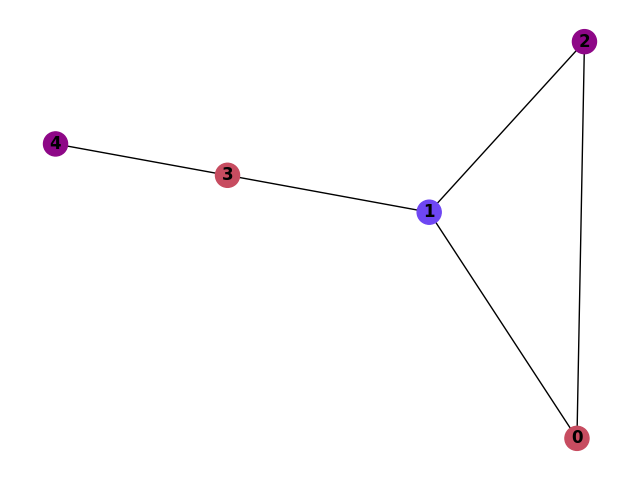

- : unit = ()


In [24]:
risolvi problema_1;;

0-0

1-1

2-1

3-2

4-3

5-2

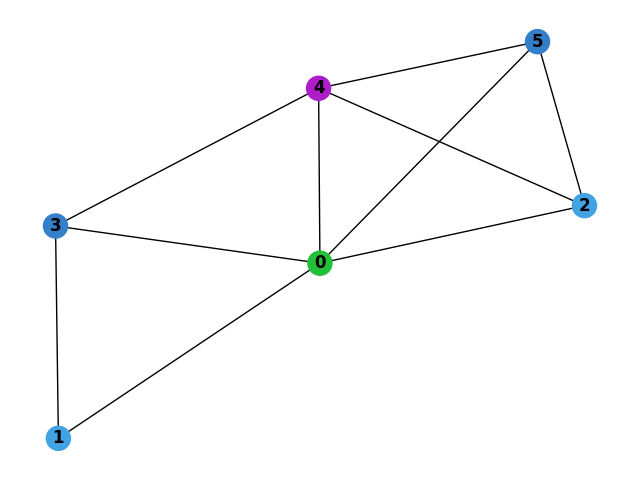

- : unit = ()


In [25]:
risolvi problema_2;;

In [26]:
risolvi problema_2_err;;

error: runtime_error

0-0

1-1

2-0

3-0

4-1

5-1

12-2

6-0

11-0

10-0

13-1

7-1

8-1

9-2

15-1

14-0

16-0

17-1

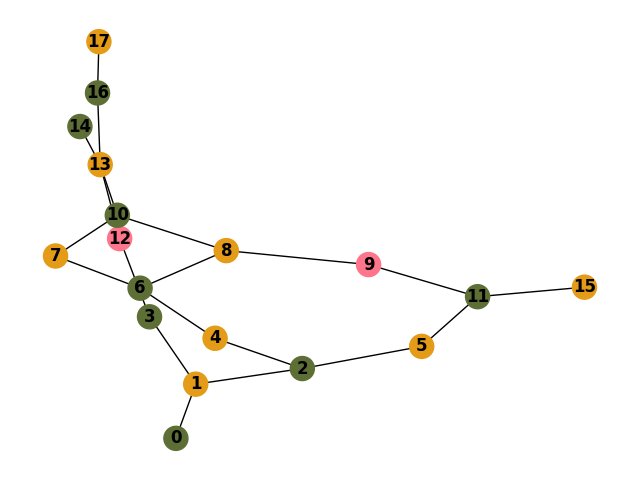

- : unit = ()


In [27]:
risolvi problema_6;;

Spazio per alcuni test e prove il live 📷

## I 💔 Jupyter <a id='progetto'></a>

Spieghino sul fatto che il progetto è anche presente nella cartella progetto e non solo un notebook, quindi può essere compilato e bla bla bla

Oltre alla stesura di questo notebook (che presenta una versione certamente funzionante, seppur minimale, dell'algoritmo) ho riscritto tutto il progetto in modo tale che sia compilabile ed eseguibili anche da terminale approfondendo anche altri argomenti e funzionalità del linguaggio.

È disponibili all'interno della cartella `progetto` e presenta la seguente struttura:

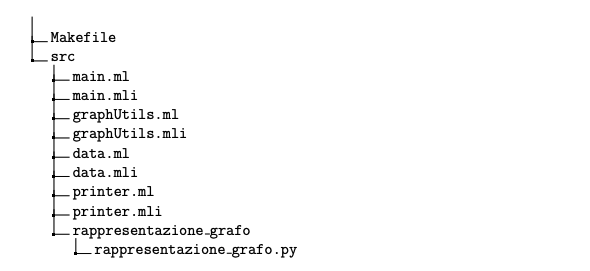

- `Makefile`: utilizzato per compilare il progetto e generare l’eseguibile per avviarlo
- `main`: contiene la funzione principale che si occupa di avviare la risoluzione dei problemi e di gestire le scelte dell’utente.
- `graphUtils`: insieme di funzioni per risolvere il problema della colorazione.
- `data`: insieme di problemi per testare il corretto funzionamento del progetto. Questi possono essere aggiunti e rimossi in modo semplice ed efficiente.
- `printer`: insieme di funzioni ed espressioni per stampare a video menu ed altri elementi con anche la presenza di colori ed emoji 🚀.
- `rappresentazione_grafo`: script in python per rappresentare a video (in modo interattivo) un grafo.

### Makefile <a id='makefile'></a>

È il file utilizzato per la compilazione del progetto che avviene tramite il comando `make`.<br>
Qualora un file venga modificato, questo permette di non dover ricompilare tutto il progetto ma solo
quello che è stato cambiato. In una prima fase compila tutti i file `.ml` con i relativi `.mli`, generando 2 altri file:

- `.cmi`: interfacce compilate utili per il corretto funzionamento dell’estensione OCaml in Visual Studio Code e per la corretta compilazione degli altri file. Questi vengono lasciati all'interno della cartella `src` e non spostati in quella designata alla fase di building per permettere il corretto funzionamento delle estensioni dell'editor.
- `.cmo`: file oggetto che verranno poi spostati nella cartella `build` per essere utilizzati nella fase di linking.

Quindi, ogni file `.cmo` dipende dai relativi file `.ml` e .`mli`. Successivamente, avvia la fase
di linking unendo insieme tutti i file `.cmo` e generando l’eseguibile `exe` nella cartella `bin`.
All’interno di quest’ultima viene copiato anche lo script python per permettere il corretto
funzionamento del progetto.

```makefile
cc = ocamlc
cflags = -c
cinclude = -I src

srcdir = src
buildir = build
bindir = bin

target = $(bindir)/exe

.PHONY: clear

all: cartelle $(target)


$(target): $(buildir)/graphUtils.cmo $(buildir)/printer.cmo $(buildir)/data.cmo $(buildir)/main.cmo
	$(cc) -o $@ $^
	cp $(srcdir)/rappresentazione_grafo/rappresentazione_grafo.py $(bindir)


$(buildir)/graphUtils.cmo: $(srcdir)/graphUtils.mli $(srcdir)/graphUtils.ml 
	$(cc) $(cinclude) $(cflags) $^
	mv $(srcdir)/graphUtils.cmo $(buildir)
	
$(buildir)/printer.cmo: $(srcdir)/printer.mli $(srcdir)/printer.ml
	$(cc) $(cinclude) $(cflags) $^
	mv $(srcdir)/printer.cmo $(buildir)

$(buildir)/data.cmo: $(srcdir)/data.mli $(srcdir)/data.ml
	$(cc) $(cinclude) $(cflags) $^
	mv $(srcdir)/data.cmo $(buildir)

$(buildir)/main.cmo: $(srcdir)/main.mli $(srcdir)/main.ml
	$(cc) $(cinclude) $(cflags) $^
	mv $(srcdir)/main.cmo $(buildir)


cartelle: $(buildir) $(bindir)

$(buildir):
	mkdir -p $@

$(bindir):
	mkdir -p $@

clear:
	rm -f $(buildir)/*.cmo
	rm -f $(bindir)/*
	rm -f $(srcdir)/*.cmi
```

Un esempio pratico di come eseguire la fase di compilazione:

In [28]:
(* compilazione del progetto *)
Process.sh "cd progetto; make; ls -LR";;

(* pulizia e rimozione dei file compilati*)
Process.sh "cd progetto; make clear; ls -LR";;

ocamlc -I src -c src/graphUtils.mli src/graphUtils.ml
mv src/graphUtils.cmo build
ocamlc -I src -c src/printer.mli src/printer.ml
mv src/printer.cmo build
ocamlc -I src -c src/data.mli src/data.ml
mv src/data.cmo build
ocamlc -I src -c src/main.mli src/main.ml
mv src/main.cmo build
ocamlc -o bin/exe build/graphUtils.cmo build/printer.cmo build/data.cmo build/main.cmo
cp src/rappresentazione_grafo/rappresentazione_grafo.py bin
.:
Makefile
bin
build
src

./bin:
exe
rappresentazione_grafo.py

./build:
data.cmo
graphUtils.cmo
main.cmo
printer.cmo

./src:
data.cmi
data.ml
data.mli
graphUtils.cmi
graphUtils.ml
graphUtils.mli
main.cmi
main.ml
main.mli
printer.cmi
printer.ml
printer.mli
rappresentazione_grafo

./src/rappresentazione_grafo:
rappresentazione_grafo.py


- : Jupyter_notebook.Process.t =
{Jupyter_notebook.Process.exit_status = Unix.WEXITED 0; stdout = None;
 stderr = None}


rm -f build/*.cmo
rm -f bin/*
rm -f src/*.cmi
.:
Makefile
bin
build
src

./bin:

./build:

./src:
data.ml
data.mli
graphUtils.ml
graphUtils.mli
main.ml
main.mli
printer.ml
printer.mli
rappresentazione_grafo

./src/rappresentazione_grafo:
rappresentazione_grafo.py


- : Jupyter_notebook.Process.t =
{Jupyter_notebook.Process.exit_status = Unix.WEXITED 0; stdout = None;
 stderr = None}


### Printer <a id='printer'></a>

In questo file risiedono tutte le funzioni e dichiarazioni che gestiscono la stampa a video.
Vi è una definizione di stringhe per stampare su terminale caratteri colorati (rosso, verde, blu,
ecc.), elementi in grassetto ed emoji (a patto che questo li supporti).<br>
La funzione più degna di nota è `stampa_grafo` che, dato un grafo, stampa a schermo tutti i nodi con i suoi
vicini (in pratica rappresenta la funzione successori).

```ocaml
type colore = Colore of string ;;

(* normali *)
let rosso = Colore " \027[31 m";;
let verde = Colore " \027[32 m";;
let ciano = Colore " \027[36 m";;
let bianco = Colore " \027[0 m";;

(* grassetto *)
let rosso_b = Colore " \027[31;1 m";;
let verde_b = Colore " \027[32;1 m";;
let ciano_b = Colore " \027[36;1 m";;
let bianco_b = Colore " \027[0;1 m";;

(* valore di reset per stampare normalmente *)
let reset = bianco ;;
```
_Alcune definizioni di colori_

<hr>

```ocaml
let stampa_grafo ( Grafo (( Successori succ ) , partenza , maxColori ) ) =
    print_colore rosso_b " Partenza : ";
    print_int partenza ; print_colore rosso_b " Max Colori : ";
    print_int maxColori ; print_string "\n\n";
    let rec search visitati = function (* frontiera *)
        [] -> print_string "\n" (* caso base , stampa \n*)
      | nodo :: coda -> (* stampa nodo e vicini *)
        if List . mem nodo visitati (* ignora nodi visti *)
            then
                search visitati coda
        else (* stampa il nodo e vicini .*)
            ( print_colore verde_b ( string_of_int nodo ) ;
            print_colore bianco_b " -> "; stampa_lista ( succ nodo ) ;
            search ( visitati@ [ nodo ]) ( coda@ ( succ nodo ) ) )

    in search [] [ partenza ] (* avvia la ricorsione *)
```

_Codice della funzione `stampa_grafico`_

<hr>

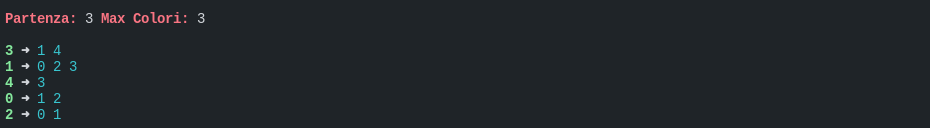

_Output della funzione_

### Data <a id='data'></a>

In questo file ci sono tutte le definizioni dei problemi utilizzati come test per verificare il corretto funzionamento dell’algoritmo di colorazione; una funzione che permette di stampare un
menù con alcune informazioni come la descrizione dei grafi, gli ID unici, ecc; ed una funzione che dato un numero (ID), ritorna uno dei precedenti problemi. È anche presente una lista (`problemi`) che contiene tutti i problemi disponibili con una descrizione (una coppia `(problema, string)`). È questa che permette di aggiungere e togliere elementi in maniera semplice senza dover modificare alcuna funzione.

```ocaml
let problemi = [
    ( problema_1 , " Grafo 1") ;
    ( problema_2 , " Grafo 2 con numero sufficiente di colori ") ;
    ( problema_2_err , " Grafo 2 con colori insufficienti ") ;
    ( problema_3 , " Grafo 3") ;
    ( problema_4 , " Grafo 4")
];;
```
_Parte della lista `problemi`_

<hr>

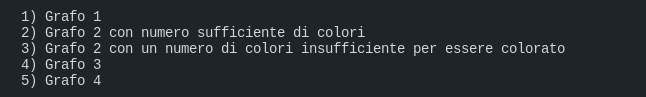

_Output per la selezione del problema da risolvere_

Infine, la funzione `scegli_problema` che, dato un ID, ritorna il relativo problema. È interessante notare come per selezionare un dato problema non viene scorsa ricorsivamente tutta la lista, ma quest’utlima viene convertita in un `Array` per poter utilizzare il metodo `get` per accedere all’i-esima posizione. Vengono effettuati alcuni controlli sull’input: viene controllato se l'ID passato è valido (non superi per eccesso, o per difetto gli ID mostrati a video) e nel caso solleva un'eccezione (verrà utilizzata nella funzione `main` per segnalare il problema).

```ocaml
let scegli_problema id_problema =
    let array_tmp = Array.of_list problemi in (* lista in array *)
        if id_problema > Array.length array_tmp || id_problema < 1
          then
            raise SceltaErrata (* lancia un ' eccezione *)
        else
            fst ( Array.get array_tmp ( id_problema -1) ) 
;;
```
_Codice della funzione scegli_problema_

### GraphUtils <a id='graphutils'></a>

### Main <a id='main'></a>

In questo file è presente la funzione principale main che si occupa di gestire tutto il flusso del programma: stampa il menu iniziale, fa scegliere all’utente su quale problema testare l’algoritmo di colorazione, avvia la risoluzione del problema selezionato, stampa il risultato ed avvia lo script python.

```ocaml
let main () =
    stampa_logo ();
    stampa_problemi_disponibili ();

    let dati =
        let rec aux () = (* utente sceglie il problema *)
            try (* controllo input valido *)
                scegli_problema ( scelta () )
            with SceltaErrata ->
                aux ()
        in aux ()
  in let avvia_colorazione (Problema(g, partenza, maxColori)) =
    print_string "\nIl Problema selezionato : \n\n";
    stampa_problema ( Problema (g , partenza , maxColori ) ) ;
    print_string " Coloro ...\ n\n";

    (* colora il grfo *)
    let colorati = risolvi (Problema(g, partenza, maxColori)) in
        stampa_nodi_colorati colorati;(*stampa il grafo colorato*)
        salva_grafo_colorato g colorati;(*salva grafo colorato*)
        avvia_python () (* avvia python *)

    in (* con un grafo scelto , lo colora *)
        try
            avvia_colorazione dati
        with InsufficentColorNumber ->
            stampa_errore ()
;;
```

_Parte del codice del file `main.ml`_

Alla riga $2 - 3$ viene stampato sul terminale il logo iniziale e tutti i problemi disponibili per testare l’algoritmo. Nelle successive righe ($5 - 27$) vengono definite alcune funzioni ausiliarie per mettere in pratica i comportamenti descritti prima:

- `dati`: rimane fermo sulla scelta del problema fin quando l’utente non seleziona un ID esistente. Una volta selezionato un ID valido conterrà il problema scelto.
- `avvia_colorazione`: stampa alcune informazioni utili all’utente per poi colorare il grafo, salvarlo su file e avviare lo script python. Qui vengono anche gestite le possibili eccezioni.

Nelle prime righe del file vengono inclusi gli altri codici descritti nelle precedenti sezioni con:

```ocaml
open Printer ;;
open GraphUtils ;;
open Data ;;
```

_Inclusione degli altri file `.ml`_

### Python <a id='python'></a>

All’interno del progetto è anche presente un breve script in python che verrà avviato una volta risolto il problema della colorazione. Questo script legge il file `.data` generato da OCaml (contiene il grafo ed i colori di ogni nodo) e lo rappresenta all’interno di una finestra in modo interattivo e soprattutto più comprensibile rispetto alla visualizzazione su terminale.

Presenta 2 modalità di utilizzo:

- **notebook**: in questa modalità produce in output un'immagine compatibile con i notebook di jupyter. Sarà poi compito di OCaml andare ad importarla e disegnarla.
- **eseguibile**: questa modalità viene utilizzata quando lo script è invocato dal progetto compilato, genera una pagina HTML, che verrà aperta in automatico, con la visualizzazione interattiva del grafo colorato.

```python
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt


def main(args):
    # controlla che il nome del file sia stato passato
    if len(args) <= 0: return

    fname = args[0]
    in_jupyter = True if len(args) >= 2 else False
    
    collegamenti = []
    nodi = []
    colori = []

    # lettura dei dati da file
    with open(fname, 'r') as f:
        for text in f.readlines():
            text = text.strip("\n") # elimina i vari \n nel file
            if text != '':  # controlla che la riga sia valida
                nodo, vicini, colore  = text.split(",")
                
                vicini = vicini.split(" ")
                colori.append(int(colore))
                
                # controlla se il nodo ha vicini
                if vicini[0] != '':  
                    # crea gli archi del grafo
                    for vicino in vicini: 
                        tmp = (int(nodo), int(vicino))
                        collegamenti.append(tmp) 
                        
    # controlla che abbia trovato tutti i nodi
    nodi = trova_nodi(collegamenti)
    # converte i colori da int a stringa hex per pyvis
    colori = aggiusta_colori(colori) 

    rappresenta_grafo(nodi, collegamenti, colori, in_jupyter)  

...


def rappresenta_grafo (nodi, collegamenti, colori, in_jupyter):
    if in_jupyter:
        G = nx.Graph()

        G.add_nodes_from(nodi)
        G.add_edges_from(collegamenti)

        nx.draw(
            G, 
            node_color=colori, 
            with_labels=True, 
            font_weight='bold'
        )
        plt.savefig("risultato.png")

    else:
        net = Network(
            width='100%', 
            height='600px', 
            directed=False
        )

        net.add_nodes(
            nodi, 
            label=[f"{x}" for x in nodi], 
            color=colori
        )
        net.add_edges(collegamenti)

        net.toggle_physics(True)
        net.inherit_edge_colors(False)
        net.write_html('rappresentazione_grafo.html')
```

_Parte delle funzioni dello script python_

<hr>

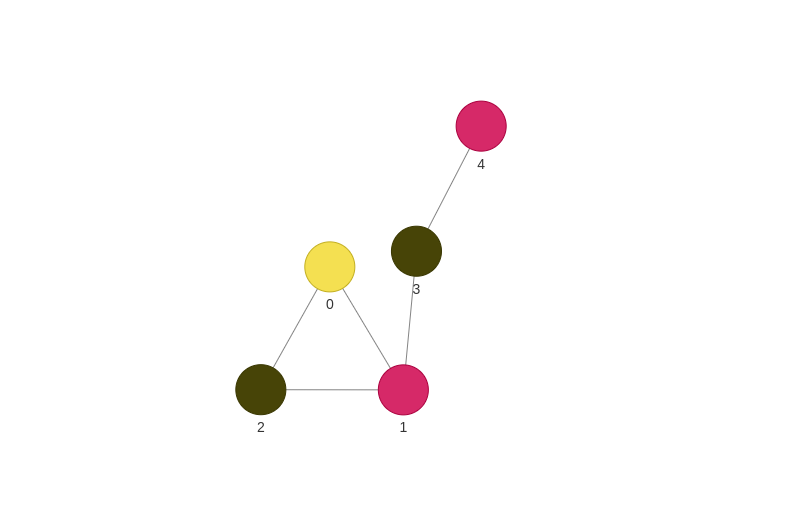

_Output dello script python_

## Ambiente di Sviluppo 🐳 <a id='ambiente'></a>

L'intero progetto è stato realizzato all'interno di un **container docker** utilizzato come ambiente di sviluppo, questo mi ha permesso di risparmiare notevole tempo nella configurazione e installazione di tutto il software necessario al funzionamento di OCaml, ma soprattutto mi dà la possibilità di avere un ambiente di sviluppo portatile che può essere condiviso e avviato su qualunque macchina in pochissimo tempo.

Il tutto si basa sull'estensione [Remote Containers](https://code.visualstudio.com/docs/remote/containers) per l'editor Visual Studio Code che permette di utilizzare un container docker come un ambiente di sviluppo _full-featured_, di poter aprire qualunque cartella all'interno del container e gestirla tramite l'editor avendo a disposizione tutte le funzionalità che mette a disposizione. È anche possibile scegliere quali estensioni di VSCode andare installare e utilizzare all'interno del nostro nuovo ambiente di sviluppo.

Il file `devcontainer.json` (presente all'interno della cartella `.devcontainer`) è quello che si occuperà di dire a VSCode come accedere, o creare, il container e quali elementi e strumenti andare a utilizzare. Di seguito un esempio:

```json
{
	"name": "ocamldev",
	"build": {
		"dockerfile": "Dockerfile",
		"context": ".."
	},

	"features": {
		"git": "latest",
		"github-cli": "latest"
	},
	"customizations": {
		"vscode": {
			"extensions": [
				"ocamllabs.ocaml-platform",
				"ms-python.python",
				"ms-toolsai.jupyter"
			]
		}
	},

	"remoteUser": "opam"
}

```

Possiamo notare alcuni campi importanti come:

- `build`: che indica il Dockerfile da utilizzare per la generazione del container
- `customizations`: che permette di configurare le impostazioni dell'editor e scegliere anche quali estensioni andare ad installare
- `remoteUser`: specifica l'utente con cui verrà effettuato l'accesso al container, di default è `root`

Il file `Dockerfile` è responsabile della creazione del nuovo container. Il seguente codice è quello utilizzato per il mio ambiente di sviluppo:

```docker
FROM ocaml/opam:latest

RUN sudo apt-get update && sudo apt upgrade -y
RUN sudo apt-get install -y zlib1g-dev libffi-dev libcairo2-dev libgmp-dev libzmq5-dev pkg-config
RUN sudo apt install -y make python3 python3-pip
RUN pip3 install jupyter
ENV PATH $PATH:/home/opam/.local/bin
RUN opam update
RUN opam user-setup install
RUN opam install -y ocaml-lsp-server
RUN opam install -y merlin
RUN opam install jupyter
RUN opam upgrade jupyter
RUN grep topfind ~/.ocamlinit || echo '#use "topfind";;' >> ~/.ocamlinit  # For using '#require' directive
RUN grep Topfind.log ~/.ocamlinit || echo 'Topfind.log:=ignore;;' >> ~/.ocamlinit  # Suppress logging of topfind (recommended but not necessary)
RUN opam exec -- ocaml-jupyter-opam-genspec
RUN jupyter kernelspec install --user --name ocaml-jupyter "$(opam config var share)/jupyter"

```

Sono partito da un'immagine già configurata per il corretto funzionamento di OCaml (solo con questa si ha un ambiente pronto per scrivere ed eseguire codice) per poi modificarla andando ad aggiungere alcuni pacchetti necessari al mio progetto (`make`, `python` e le varie librerie per python). Ho poi deciso d'installare un server jupyter (che può essere avviato all'evenienza) con un [kernel](https://akabe.github.io/ocaml-jupyter/) in grado di eseguire OCaml all'interno dei notebook. Non è potente come quello di python ma risulta comunque utilizzabile e più che sufficiente per le mie necessità.